In [1]:
!pip uninstall numpy pmdarima -y
!pip install numpy==1.26.4 pmdarima

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 61.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


                                ARIMA (Autoregressive Integrated Moving Averages)

The general process for the ARIMA model is given as follows:

1. Visualize the time series data
2. To make the time series data Stationary
3. Plot the Correlation and AutoCorrelation Charts
4. Construct the ARIMA model based on the data
5. Use the model to make predictions


In [1]:
#Import the Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from prophet import Prophet
from pmdarima import auto_arima
import plotly.express as px

In [2]:
#Import the dataset
data=pd.read_csv('stock1.csv')
print('Shape of the data',data.shape)

Shape of the data (4209, 8)


In [3]:
data.head()

,Price,Date,Adj Close,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05 00:00:00+00:00,32.92603683,56.58751297,61.59376525878906,46.77188491821289,50.51251220703125,855215656
2,1,2007-10-08 00:00:00+00:00,31.240449905395508,53.69063949584961,58.50001525878906,53.35313797,58.50001525878906,126671715
3,2,2007-10-09 00:00:00+00:00,33.367889404296875,57.34688949584961,57.85313797,50.82188797,53.71876144,116725709
4,3,2007-10-10 00:00:00+00:00,33.678829193115234,57.881263732910156,59.06251525878906,57.37501525878906,58.83751297,67931378


In [4]:
new_data = data.drop(0)# or we use 'dropna()' command to remove the nan or any missing values.

In [5]:
new_data.head()

,Price,Date,Adj Close,Close,High,Low,Open,Volume
1,0,2007-10-05 00:00:00+00:00,32.92603683,56.58751297,61.59376525878906,46.77188491821289,50.51251220703125,855215656
2,1,2007-10-08 00:00:00+00:00,31.240449905395508,53.69063949584961,58.50001525878906,53.35313797,58.50001525878906,126671715
3,2,2007-10-09 00:00:00+00:00,33.367889404296875,57.34688949584961,57.85313797,50.82188797,53.71876144,116725709
4,3,2007-10-10 00:00:00+00:00,33.678829193115234,57.881263732910156,59.06251525878906,57.37501525878906,58.83751297,67931378
5,4,2007-10-11 00:00:00+00:00,37.44273376464844,64.35001373291016,67.50001525878906,57.37501525878906,67.50001525878906,106320954


In [6]:
new_data.info()# To Know about our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4208 entries, 1 to 4208
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      4208 non-null   object
 1   Date       4208 non-null   object
 2   Adj Close  4208 non-null   object
 3   Close      4208 non-null   object
 4   High       4208 non-null   object
 5   Low        4208 non-null   object
 6   Open       4208 non-null   object
 7   Volume     4208 non-null   object
dtypes: object(8)
memory usage: 263.1+ KB


In [7]:
# Convert 'Date' to datetime and set as index
new_data['Date'] = pd.to_datetime(new_data['Date'])
new_data['Date'] = new_data['Date'].dt.date
new_data.set_index('Date', inplace=True)

In [8]:
new_data.head() #To show the 1st 5 cells

,Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2007-10-05,0,32.92603683,56.58751297,61.59376525878906,46.77188491821289,50.51251220703125,855215656
2007-10-08,1,31.240449905395508,53.69063949584961,58.50001525878906,53.35313797,58.50001525878906,126671715
2007-10-09,2,33.367889404296875,57.34688949584961,57.85313797,50.82188797,53.71876144,116725709
2007-10-10,3,33.678829193115234,57.881263732910156,59.06251525878906,57.37501525878906,58.83751297,67931378
2007-10-11,4,37.44273376464844,64.35001373291016,67.50001525878906,57.37501525878906,67.50001525878906,106320954


In [9]:
new_data['Close']

,Close
Date,
2007-10-05,56.58751297
2007-10-08,53.69063949584961
2007-10-09,57.34688949584961
2007-10-10,57.881263732910156
2007-10-11,64.35001373291016
...,...
2024-10-25,315.79998779296875
2024-10-28,318.29998779296875
2024-10-29,320.54998779296875


In [10]:
#Added code to ensure 'Close' is numeric
# Convert 'Close' column to numeric, coercing errors to NaN
new_data['Close'] = pd.to_numeric(new_data['Close'], errors='coerce')

In [11]:
new_data['Close']

,Close
Date,
2007-10-05,56.587513
2007-10-08,53.690639
2007-10-09,57.346889
2007-10-10,57.881264
2007-10-11,64.350014
...,...
2024-10-25,315.799988
2024-10-28,318.299988
2024-10-29,320.549988


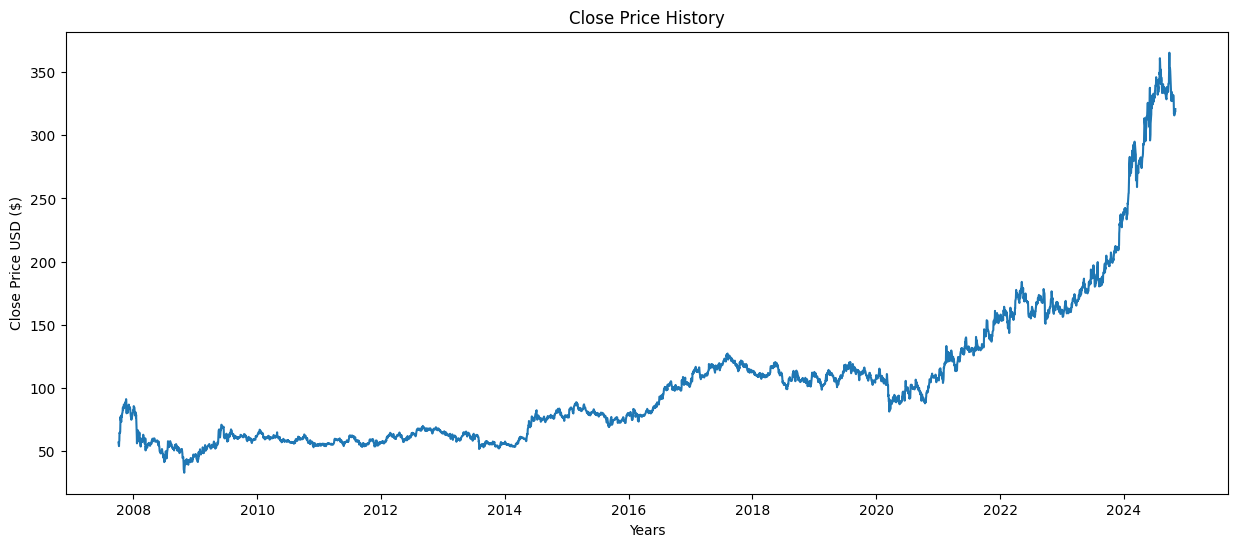

In [12]:
plt.figure(figsize = (15,6))
new_data['Close'] = pd.to_numeric(new_data['Close'], errors='coerce')
new_data['Close'].plot()
plt.title('Close Price History')
plt.xlabel('Years')
plt.ylabel('Close Price USD ($)')
plt.show()

In [13]:
# To make a plot on plotly
fig = px.line(new_data, x=new_data.index, y='Close', title='Close Price History')
fig.show()

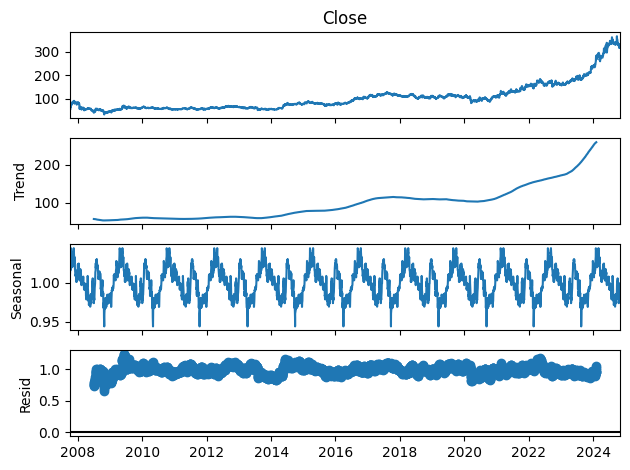

In [14]:
# Explicitly set the period for seasonal_decompose assuming daily data
result = seasonal_decompose(new_data['Close'], model='multiplicative', period=365)
result.plot()
plt.show()

To check Stationarity:

Subtract the previous value from the current value. Now if we just difference once,we might not get the stationary series, so we might need to do that multiple time. The minimum of differenceing operations needed to make the series Stationary, needs to be imputed into our ARIMA model.

ADF test:

We'll use the Augumented Dickey Fuller (ADF) test to check if the price series is Stationary or not.

H0: The time series is non Stationary. vs H1: The time series is Stationary.

Here the null hypothesis of the ADF test is that the time series is non Stationary. So, if the p-value of the test is less than the significance level (0.05) then we can reject our null hypothesis,else we accept our null hypothesis.

In [15]:
#Check the series is Stationary or not
from statsmodels.tsa.stattools import adfuller
result = adfuller(new_data.Close.dropna())
print(f"ADF Statistics:  {result[0]}")
print(f"p-value:  {result[1]}")
print(f"Number of lags used:  {result[2]}")
print(f"Number of observations used:  {result[3]}")
print(f"Critical values:  {result[4]}")

ADF Statistics:  3.7537025721837183
p-value:  1.0
Number of lags used:  30
Number of observations used:  4177
Critical values:  {'1%': -3.4319165126230358, '5%': -2.8622321991719093, '10%': -2.567138463608384}


Transform into Non Stationary to Stationary:Differencing

In [16]:
# Apply differencing to the 'Close' column
df_train_diff = new_data['Close'].diff().dropna()#[current observations] - [previous observations]
df_train_diff

,Close
Date,
2007-10-08,-2.896873
2007-10-09,3.656250
2007-10-10,0.534374
2007-10-11,6.468750
2007-10-12,-0.421875
...,...
2024-10-25,-3.350006
2024-10-28,2.500000
2024-10-29,2.250000


In [17]:
#  Normalizing  the values for better predictions in our model
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) # Values from 0 to 1
# Reshape the Series into a 2D array before scaling
scaled_data = scaler.fit_transform(df_train_diff.values.reshape(-1, 1))

In [18]:
scaled_data

array([[0.55952591],
       [0.65401943],
       [0.60900318],
       ...,
       [0.63374185],
       [0.57101687],
       [0.63518346]])

In [19]:
len(scaled_data)

4207

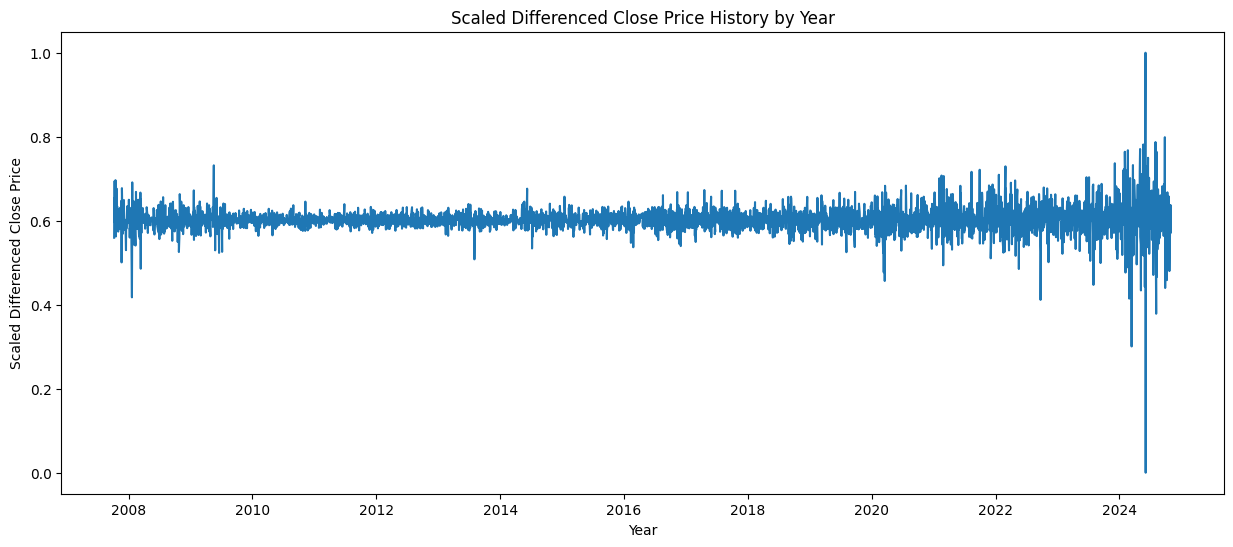

In [20]:
#To plot the the scaled data with respect to the year
df_train_diff=scaled_data
plt.figure(figsize = (15,6)) # Added figure and axes for better control
# Use the date index from the original data for the x-axis, skipping the first date due to differencing
plt.plot(new_data.index[1:], df_train_diff)
plt.title('Scaled Differenced Close Price History by Year')
plt.xlabel('Year')
plt.ylabel('Scaled Differenced Close Price')
plt.show()

In [21]:
#Check the series is Stationary or not
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_train_diff)
print(f"ADF Statistics:  {result[0]}")
print(f"p-value:  {result[1]}")
print(f"Number of lags used:  {result[2]}")
print(f"Number of observations used:  {result[3]}")
print(f"Critical values:  {result[4]}")

ADF Statistics:  -13.153606921706537
p-value:  1.351257331484302e-24
Number of lags used:  29
Number of observations used:  4177
Critical values:  {'1%': -3.4319165126230358, '5%': -2.8622321991719093, '10%': -2.567138463608384}


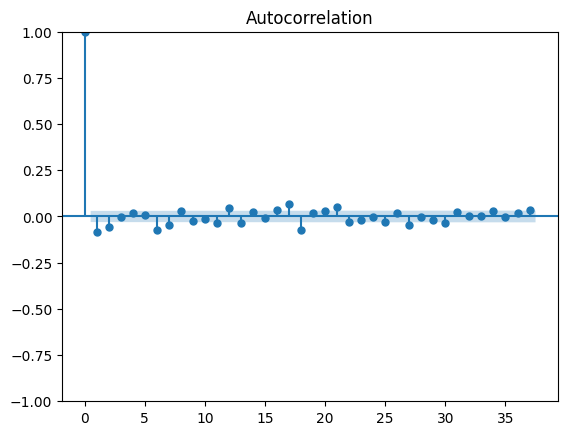

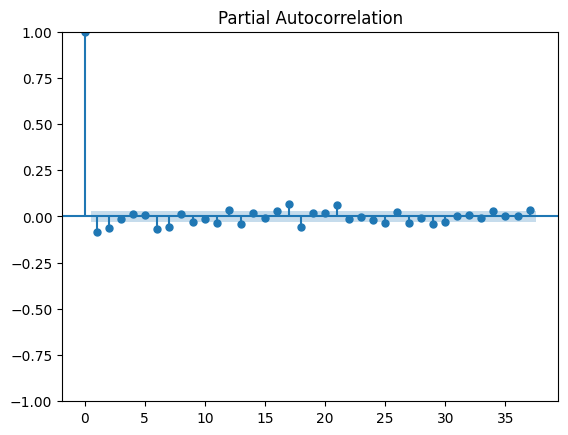

In [22]:
#Plot the acf and pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df_train_diff)
plt.show()
plot_pacf(df_train_diff)
plt.show()

Now we reject our null hypothesis,so the given series is stationary.

Figure Out the Order for ARIMA Model:

In [23]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [24]:
stepwise_fit = auto_arima(df_train_diff,trace=True,supress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=13.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-14094.431, Time=0.68 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-15381.365, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=6.99 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-14096.431, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-16005.956, Time=1.31 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-16378.276, Time=0.97 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-16588.259, Time=2.45 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-16644.570, Time=1.18 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-17270.765, Time=26.71 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-17161.841, Time=12.86 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-17235.559, Time=9.80 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-17248.089, Time=16.36 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=8.14 sec

Best model:  ARIMA(5,

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4207
Model:               SARIMAX(5, 1, 1)   Log Likelihood                8643.383
Date:                Thu, 24 Jul 2025   AIC                         -17270.765
Time:                        04:13:40   BIC                         -17220.011
Sample:                             0   HQIC                        -17252.820
                               - 4207                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.032e-05   1.45e-05      0.712      0.477   -1.81e-05    3.87e-05
ar.L1         -0.0715      0.007    -10.702      0.000      -0.085      -0.058
ar.L2         -0.0905      0.008    -11.820      0.000      -0.106      -0.075
ar.L3         -0.0545      0.009     -6.327      0.000      -0.071      -0.038
ar.L4         -0.0947      0.009    -10.171      0.000      -0.113      -0.076
ar.L5          0.0242      0.009      2.646      0.008       0.006       0.042
ma.L1         -0.9714      0.004   -233.451      0.000      -0.980      -0.963
sigma2         0.0009   6.52e-06    144.847      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   4.30   Jarque-Bera (JB):            355771.25
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               6.12   Skew:                            -1.65
Prob(H) (two-sided):                  0.00   Kurtosis:                        47.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
from statsmodels.tsa.arima_model import ARIMA

In [26]:
#TO SPLIT THE DATASET
train_size = int(len(df_train_diff) * 0.8)
train, test = df_train_diff[:train_size], df_train_diff[train_size:]

In [27]:
print(train[:5].reshape(-1, 1))

[[0.55952591]
 [0.65401943]
 [0.60900318]
 [0.6945746 ]
 [0.59521444]]


In [28]:
test[:5].reshape(-1, 1)

array([[0.58345339],
       [0.66659171],
       [0.5976477 ],
       [0.63901389],
       [0.62076428]])

Fit the ARIMA model:

In [29]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train,order = (5,0,1))
model = model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3365
Model:                 ARIMA(5, 0, 1)   Log Likelihood                8327.878
Date:                Thu, 24 Jul 2025   AIC                         -16639.757
Time:                        04:13:47   BIC                         -16590.787
Sample:                             0   HQIC                        -16622.245
                               - 3365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6016      0.000   1898.310      0.000       0.601       0.602
ar.L1         -0.0126     14.158     -0.001      0.999     -27.762      27.737
ar.L2         -0.0345      0.394     -0.088      0.9

Make predictions on the test set

In [47]:
start = len(train)
end = len(train) + len(test) - 1
predictions = model.predict(start=start,end=end,typ='levels')
print(predictions)
len(predictions)
#predictions.index = new_data.index[start:end+1]#To indexing the 'date' column.


[0.59993657 0.59888863 0.59720585 0.60186074 0.60185166 0.60185231
 0.60159608 0.60160108 0.60160601 0.60161996 0.60161934 0.6016188
 0.60161805 0.60161811 0.60161815 0.60161819 0.60161819 0.60161819
 0.60161818 0.60161818 0.60161818 0.60161818 0.60161818 0.60161818
 0.60161818 0.60161818 0.60161818 0.60161818 0.60161818 0.60161818
 0.60161818 0.60161818 0.60161818 0.60161818 0.60161818 0.60161818
 0.60161818 0.60161818 0.60161818 0.60161818 0.60161818 0.60161818
 0.60161818 0.60161818 0.60161818 0.60161818 0.60161818 0.60161818
 0.60161818 0.60161818 0.60161818 0.60161818 0.60161818 0.60161818
 0.60161818 0.60161818 0.60161818 0.60161818 0.60161818 0.60161818
 0.60161818 0.60161818 0.60161818 0.60161818 0.60161818 0.60161818
 0.60161818 0.60161818 0.60161818 0.60161818 0.60161818 0.60161818
 0.60161818 0.60161818 0.60161818 0.60161818 0.60161818 0.60161818
 0.60161818 0.60161818 0.60161818 0.60161818 0.60161818 0.60161818
 0.60161818 0.60161818 0.60161818 0.60161818 0.60161818 0.60161

842

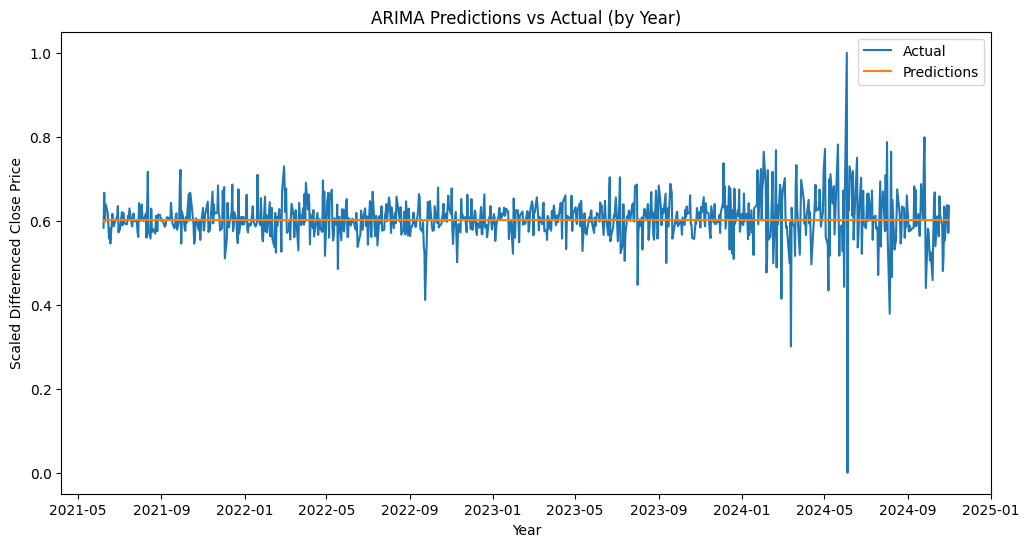

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Get the date index corresponding to the test set
test_index = new_data.index[len(train)+1:] # Adjusting index for differencing

plt.plot(test_index, test, label='Actual') # Plot actual test values against their dates
plt.plot(test_index, predictions, label='Predictions') # Plot predictions against the same dates

plt.title('ARIMA Predictions vs Actual (by Year)')
plt.xlabel('Year')
plt.ylabel('Scaled Differenced Close Price') # Keep ylabel consistent with the data being plotted
plt.legend()
plt.show()

In [32]:
test.mean(),len(test)

(0.6045157415500186, 842)

In [33]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test,predictions))
print(rmse)

0.05528654691877284


In [34]:
model2=ARIMA(new_data['Close'],order=(5,0,1))
model2=model2.fit()
new_data.tail()

,Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2024-10-25,4203,311.33111572265625,315.799988,321.5,313.25,321.5,12979410
2024-10-28,4204,313.7957458496094,318.299988,320.45001220703125,310.75,314.5,9610615
2024-10-29,4205,316.013916,320.549988,321.20001220703125,314.1499938964844,316.1000061035156,15856332
2024-10-30,4206,313.94366455078125,318.450012,325.3999938964844,316.75,318.54998779296875,14498110
2024-10-31,4207,316.2603759765625,320.799988,322.70001220703125,317.8500061035156,320.3999938964844,9900390


In [35]:
# Create a date range for the future predictions
index_future_dataset = pd.date_range(start='2024-10-31', periods=31)

# Predict the future values
# The start is the end of the training data index + 1, and the end is start + periods - 1
pred = model2.predict(start=len(new_data), end=len(new_data) + 30, typ='levels').rename('ARIMA Predictions')

# Assign the future date index to the predictions
pred.index = index_future_dataset
print(pred)

2024-10-31    320.811398
2024-11-01    320.571406
2024-11-02    320.661144
2024-11-03    320.571148
2024-11-04    320.661938
2024-11-05    320.563040
2024-11-06    320.651559
2024-11-07    320.555175
2024-11-08    320.641981
2024-11-09    320.547300
2024-11-10    320.632366
2024-11-11    320.539406
2024-11-12    320.622771
2024-11-13    320.531496
2024-11-14    320.613192
2024-11-15    320.523571
2024-11-16    320.603629
2024-11-17    320.515631
2024-11-18    320.594083
2024-11-19    320.507675
2024-11-20    320.584552
2024-11-21    320.499705
2024-11-22    320.575036
2024-11-23    320.491720
2024-11-24    320.565535
2024-11-25    320.483722
2024-11-26    320.556048
2024-11-27    320.475709
2024-11-28    320.546577
2024-11-29    320.467683
2024-11-30    320.537119
Freq: D, Name: ARIMA Predictions, dtype: float64


In [ ]:
pred.plot(figsize=(12, 6), title='ARIMA Predictions for the Next One month')

<Axes: title={'center': 'ARIMA Predictions for the Next One month'}>

In [37]:
#create a sarima model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_sarima = SARIMAX(train, order=(5, 0, 1), seasonal_order=(1, 1, 1, 12))
model_sarima = model_sarima.fit()

In [38]:
print(model_sarima.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 3365
Model:             SARIMAX(5, 0, 1)x(1, 1, 1, 12)   Log Likelihood                8264.449
Date:                            Thu, 24 Jul 2025   AIC                         -16510.899
Time:                                    04:14:52   BIC                         -16455.840
Sample:                                         0   HQIC                        -16491.206
                                           - 3365                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0834      4.674     -0.018      0.986      -9.245       9.078
ar.L2         -0.0340      0.125   

In [39]:
#make prediction
start = len(train)
end = len(train) + len(test) - 1
predictions = model_sarima.predict(start=start,end=end,typ='levels')
print(predictions)

[0.60144181 0.59808071 0.59724688 0.60042942 0.60361032 0.59978761
 0.60122745 0.59909715 0.60343615 0.60149637 0.60227554 0.6057555
 0.60290438 0.60021748 0.60174733 0.60036214 0.6029916  0.59971533
 0.601284   0.59919945 0.60327903 0.6015581  0.60228843 0.6051926
 0.60291568 0.60023317 0.60177998 0.6003616  0.6029871  0.59971481
 0.60128441 0.59920019 0.60327789 0.60155855 0.60228853 0.60518851
 0.60291577 0.60023328 0.60178022 0.6003616  0.60298707 0.59971481
 0.60128441 0.5992002  0.60327788 0.60155855 0.60228853 0.60518848
 0.60291577 0.60023328 0.60178022 0.6003616  0.60298707 0.59971481
 0.60128441 0.5992002  0.60327788 0.60155855 0.60228853 0.60518848
 0.60291577 0.60023328 0.60178022 0.6003616  0.60298707 0.59971481
 0.60128441 0.5992002  0.60327788 0.60155855 0.60228853 0.60518848
 0.60291577 0.60023328 0.60178022 0.6003616  0.60298707 0.59971481
 0.60128441 0.5992002  0.60327788 0.60155855 0.60228853 0.60518848
 0.60291577 0.60023328 0.60178022 0.6003616  0.60298707 0.599714

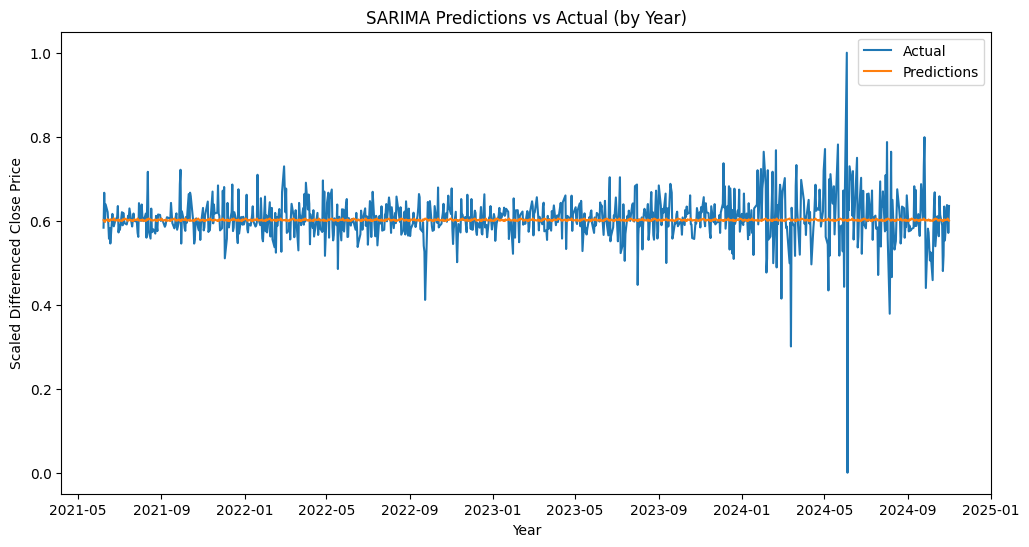

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(test_index, test, label='Actual')
plt.plot(test_index, predictions, label='Predictions')
plt.title('SARIMA Predictions vs Actual (by Year)')
plt.xlabel('Year')
plt.ylabel('Scaled Differenced Close Price')
plt.legend()
plt.show()

In [41]:
test.mean(),len(test)

(0.6045157415500186, 842)

In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test,predictions))
print(rmse)

0.05529388880032909


In [43]:
model3=SARIMAX(new_data['Close'],order=(5,0,1),seasonal_order=(1,1,1,12))
model3=model3.fit()


In [48]:
# Create a date range for the future predictions
index_future_dataset = pd.date_range(start = '2024-10-31', periods=31)
# Predict the future values
# The start is the end of the training data index + 1, and the end is start + periods - 1
pred = model3.predict(start=len(new_data), end=len(new_data) + 30, typ='levels').rename('SARIMA Predictions')
# Assign the future date index to the predictions
pred.index = index_future_dataset

In [49]:
#plt.figure(figsize=(12,6))
#pred.plot(figsize=(12,6),title='SARIMA Predictions for the Next One month')

# To make a plot on plotly
fig = px.line(pred, x=pred.index, y='SARIMA Predictions', title='SARIMA Predictions for the Next One month')
fig.show()

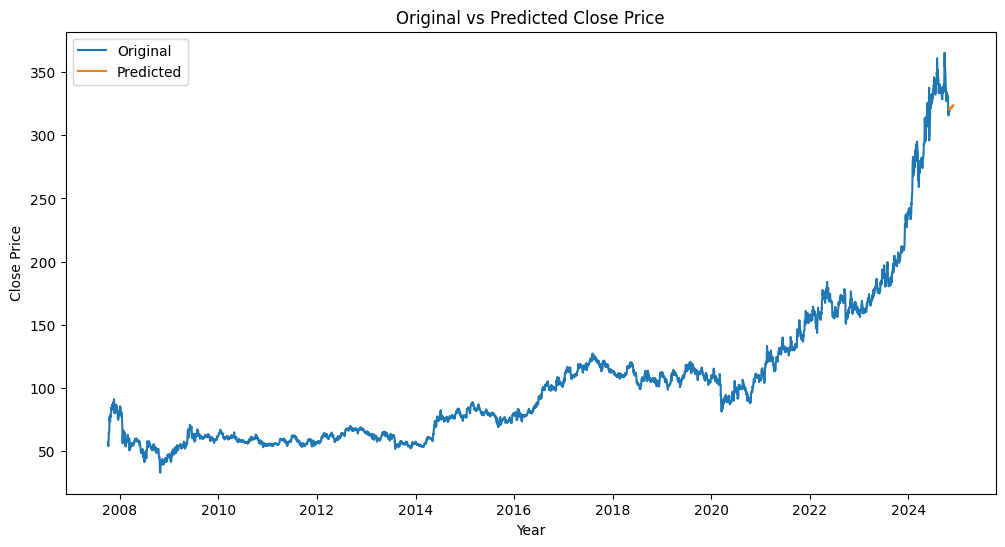

In [46]:
#plot the original vs predicted graph
plt.figure(figsize=(12,6))
plt.plot(new_data['Close'],label='Original')
plt.plot(pred,label='Predicted')
plt.title('Original vs Predicted Close Price')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.legend()
plt.show()